In [1]:
import tensorflow as tf
from tensorflow import keras
import import_ipynb
from dataloader import get_X_df, get_y_df, data_prep
from model_arch import build_LDW_model
from hyperparameters import EPOCHS, LEARNING_RATE, BATCH_SIZE
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

2023-09-13 18:26:55.327007: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 18:26:55.360986: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 18:26:55.361554: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 18:26:56.097143: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


importing Jupyter notebook from dataloader.ipynb
Tensorflow version: 2.12.0
importing Jupyter notebook from model_arch.ipynb
importing Jupyter notebook from hyperparameters.ipynb
Tensorflow version: 2.12.0
Tensorflow version: 2.12.0


In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.12.0


In [3]:
data_filepath = "../../../data/csv/plant_data.csv"

In [4]:
df = pd.read_csv(data_filepath)
df['LDW_g'].mean()

3.263849287169043

In [5]:
X = get_X_df(data_filepath)
y = get_y_df(data_filepath, "LDW_g")
#X.tail()
X_train, X_test, y_train, y_test = data_prep(X, y)
X.tail()

,plant_area,plant_convex_hull_area,plant_solidity,plant_perimeter,plant_width,plant_height,plant_longest_path,plant_convex_hull_vertices,plant_ellipse_major_axis,plant_ellipse_minor_axis,plant_ellipse_angle,plant_ellipse_eccentricity,height_cm
486,19084,22974.0,0.830678,767.938160,193,167,1367,33,190.580887,137.733093,62.138748,0.691160,13.0
487,18373,21556.5,0.852318,661.612260,164,189,1317,29,176.040924,141.141724,22.056726,0.597653,14.8
488,23374,26050.0,0.897274,683.754395,186,194,1427,31,191.379974,164.496170,175.959305,0.511091,16.9
489,23457,25678.5,0.913488,671.754395,198,179,1364,31,194.815384,159.870819,122.656914,0.571464,16.6
490,18533,22886.5,0.809779,821.595015,189,168,1376,22,193.579941,133.306320,123.732269,0.725106,14.7


In [6]:
model = build_LDW_model()
print('Input shape:', X_train[0].shape)

Input shape: (13,)


2023-09-13 18:26:57.558547: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-13 18:26:57.635070: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [8]:
history = model.fit (
    X_train, y_train,
    epochs = EPOCHS,
    validation_split = 0.2
)

Epoch 1/375


ValueError: in user code:

    File "/home/shilo/Documents/GitHub/PlantFlow/venv/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/shilo/Documents/GitHub/PlantFlow/venv/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/shilo/Documents/GitHub/PlantFlow/venv/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/shilo/Documents/GitHub/PlantFlow/venv/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/shilo/Documents/GitHub/PlantFlow/venv/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/shilo/Documents/GitHub/PlantFlow/venv/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 11), found shape=(32, 13)


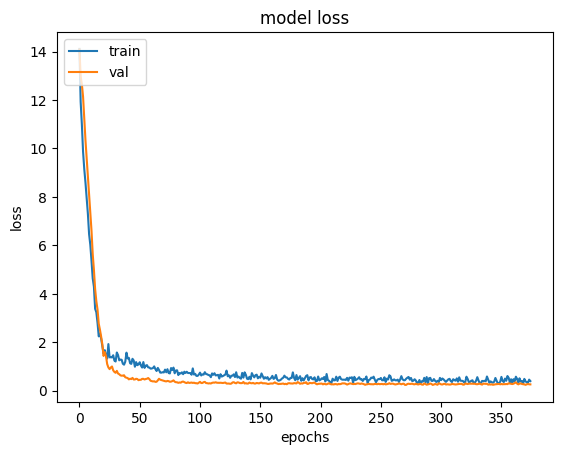

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0982


0.09822139889001846